# Tensorflow

>**TensorFlow** (https://www.tensorflow.org/) is a software library, developed by Google Brain Team within Google's Machine Learning Intelligence research organization, for the purposes of conducting machine learning and deep neural network research. 

>TensorFlow combines the computational algebra of compilation optimization techniques, making easy the calculation of many mathematical expressions that would be difficult to calculate, instead.



## Tensorflow Main Features

* Defining, optimizing, and efficiently calculating mathematical expressions involving multi-dimensional arrays (tensors).

* Programming support of **deep neural networks** and machine learning techniques.

* Transparent use of GPU computing, automating management and optimization of the same memory and the data used. You can write the same code and run it either on CPUs or GPUs. More specifically, TensorFlow will figure out which parts of the computation should be moved to the GPU.

* High scalability of computation across machines and huge data sets.

## Data Flow Graph

* (**IDEA**) 
_A Machine Learning application is the result of the repeated computation of complex mathematical expressions, thus 
we could describe this computation by using a **Data Flow Graph**

* **Data Flow Graph**: a graph where:
    - each Node represents the _instance_ of a mathematical operation 
        - `multiply`, `add`, `divide`
    - each Edge is a multi-dimensional data set (`tensors`) on which the operations are performed.

## Tensorflow Graph Model

* **Node**: In TensorFlow, each node represents the instantion of an operation. 
    - Each operation has inputs (`>= 2`) and outputs `>= 0`.
    
* **Edges**: In TensorFlow, there are two types of edge:
    - Data Edges: 
    They are carriers of data structures (`tensors`), where an output of one operation (from one node) becomes the input for another operation.
    - Dependency Edges: These edges indicate a _control dependency_ between two nodes (i.e. "happens before" relationship). 
        + Let's suppose we have two nodes `A` and `B` and a dependency edge connecting `A` to `B`. This means that `B` will start its operation only when the operation in `A` ends. 

## Tensorflow Graph Model (cont.)

* **Operation**: This represents an abstract computation, such as adding or multiplying matrices. 
    - An operation manages tensors, and It can just be polymorphic: the same operation can manipulate different tensor element types. 
        + For example, the addition of two int32 tensors, the addition of two float tensors, and so on.

* **Kernel**: This represents the concrete implementation of that operation. 
    - A kernel defines the implementation of the operation on a particular device. 
        + For example, an `add matrix` operation can have a CPU implementation and a GPU one.

# Basic Tensorflow usage

To use it, just import it as usual!
Here we decided also to print installed version

In [1]:
import warnings
warnings.filterwarnings('ignore')
import tensorflow as tf
print(tf.__version__)

2.0.0-beta1


Just to see how Tensorflow 2.0 makes our life easier let's compare such a simple operation as declaring two constants and printing its sum, both in Tensorflow 1.xx way and in the new Tensorflow fashion. Assuming you've installed and imported as tf both version (each at a time)

### Tensorflow 1.xx way

In [2]:
tfs = tf.InteractiveSession()
c1 = tf.constant(10, name='x')
c2 = tf.constant(2, name='y')
op = tf.add(c1, c2)
tfs.run(op)

AttributeError: module 'tensorflow' has no attribute 'InteractiveSession'

### Tensorflow 2.0 way

In [4]:
c1 = tf.constant(10)
c2 = tf.constant(2)
print(tf.add(c1, c2))

tf.Tensor(12, shape=(), dtype=int32)


As you can see, in contrast with Tensorflow 1.xx, in Tensorflow 2.0 we don need an <code>InteractiveSession</code> to run a simple piece of code, or anything!.

Let's see a more elaborated example.

### Operations with Tensorflow 1.xx

```python
g = tf.Graph()
with g.as_default():
    a = tf.constant([[10, 10], [11.,1.]])
    x = tf.constant([[1., 0.], [0.,1.]])
    b = tf.Variable(12.)
    y = tf.matmul(a, x) + b
    init_op = tf.global_variables_initializer()
    
with tf.Session() as sess:
    sess.run(init_op)
    print(sess.run(y))
```

### Operations with Tensorflow 2.0

In [5]:
a = tf.constant([[10, 10], [11.,1.]])
x = tf.constant([[1., 0.], [0.,1.]])
b = tf.Variable(12.)
y = tf.matmul(a, x) + b
print(y.numpy())

[[22. 22.]
 [23. 13.]]


As a summary, with its **eager execution**:
1. __Tensorflow 2.0__ doesn't require the graph definition,
2. neither the session execution,
3. or variable sharing via scopes and
4. it doesn't make mandatory to initialize variables.

Nice! isn't it?

### You also may encapsulate pieces of code using tensorflow functions

In [6]:
@tf.function
def mat_mul_plus_esc(m1, m2, e1):
    b = tf.constant(e1)
    m = tf.matmul(tf.constant(m1), tf.constant(m2))
    return m + b

a1 = [[10, 10], [11.,1.]]
x1 = [[1., 0.], [0.,1.]]
e1 = 12.
print(mat_mul_plus_esc(a1, x1, e1).numpy())

[[22. 22.]
 [23. 13.]]


# Data Types (Tensors)

## One Dimensional Tensor (Vector)

In [7]:
import numpy as np
tensor_1d = np.array([1, 2.5, 4.6, 5.75, 9.7])
tf_tensor=tf.convert_to_tensor(tensor_1d,dtype=tf.float64)
print(tf_tensor)
print(tf_tensor[0])
print(tf_tensor[2])

tf.Tensor([1.   2.5  4.6  5.75 9.7 ], shape=(5,), dtype=float64)
tf.Tensor(1.0, shape=(), dtype=float64)
tf.Tensor(4.6, shape=(), dtype=float64)


## Two Dimensional Tensor (Matrix)

In [8]:
tensor_2d = np.arange(16).reshape(4, 4)
print(tensor_2d)
tf_tensor = tf.convert_to_tensor(tensor_2d, dtype= tf.float32)
print(tf_tensor)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]]
tf.Tensor(
[[ 0.  1.  2.  3.]
 [ 4.  5.  6.  7.]
 [ 8.  9. 10. 11.]
 [12. 13. 14. 15.]], shape=(4, 4), dtype=float32)


# Basic Operations (Examples)

In [9]:
matrix1 = np.array([(2,2,2),(2,2,2),(2,2,2)],dtype='float32') 
matrix2 = np.array([(1,1,1),(1,1,1),(1,1,1)],dtype='float32')

In [10]:
tf_mat1 = tf.constant(matrix1) 
tf_mat2 = tf.constant(matrix2)

In [11]:
matrix_product = tf.matmul(tf_mat1, tf_mat2)
matrix_sum = tf.add(tf_mat1, tf_mat2)

In [12]:
matrix_det = tf.linalg.det(matrix2)

In [13]:
print("matrix1*matrix2 : \n", matrix_product)
print("matrix1+matrix2 : \n", matrix_sum)
print("det(matrix2) : \n", matrix_det)

matrix1*matrix2 : 
 tf.Tensor(
[[6. 6. 6.]
 [6. 6. 6.]
 [6. 6. 6.]], shape=(3, 3), dtype=float32)
matrix1+matrix2 : 
 tf.Tensor(
[[3. 3. 3.]
 [3. 3. 3.]
 [3. 3. 3.]], shape=(3, 3), dtype=float32)
det(matrix2) : 
 tf.Tensor(0.0, shape=(), dtype=float32)


# Handling Tensors

In [14]:
%matplotlib inline

In [15]:
import matplotlib.image as mp_image
filename = "../imgs/keras-logo-small.jpg"
input_image = mp_image.imread(filename)

In [16]:
#dimension
print('input dim = {}'.format(input_image.ndim))
#shape
print('input shape = {}'.format(input_image.shape))

input dim = 3
input shape = (300, 300, 3)


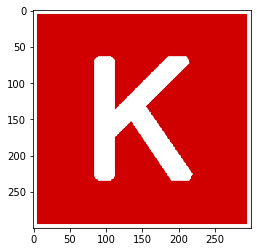

In [17]:
import matplotlib.pyplot as plt
plt.imshow(input_image)
plt.show()

## Slicing

In [19]:
result_slice = tf.slice(input_image,[10,0,0],[16,-1,-1])

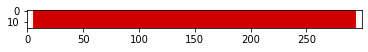

In [20]:
plt.imshow(result_slice)
plt.show()

## Transpose

__Tensorflow 1.x.y__

```python
x = tf.Variable(input_image,name='x')
model = tf.global_variables_initializer()

with tf.Session() as session:
    x = tf.transpose(x, perm=[1,0,2])
    session.run(model)
    result=session.run(x)
```

__Tensorflow 2.p.q__

In [34]:
x = tf.Variable(input_image,name='x')
result_transpose = tf.transpose(x, perm=[1,0,2])

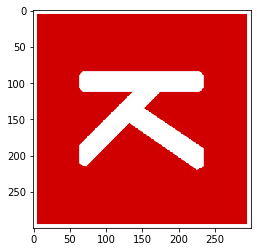

In [35]:
plt.imshow(result_transpose)
plt.show()

## Computing the Gradient

Tensorflow 2.0 works in eager_execution mode by default, this mode doesn't allow gradient calculation in the same manner that Tensorflow 1.0. This example is more complicated than previous, and also more complex than gradient calculation in previou version of tensorflow.

```python
x = tf.placeholder(tf.float32)
y = tf.log(x)   
var_grad = tf.gradients(y, x)
with tf.Session() as session:
    var_grad_val = session.run(var_grad, feed_dict={x:2})
    print(var_grad_val)
```

In [38]:
model = tf.keras.models.Sequential(
    [tf.keras.layers.Dense(10, input_shape=(3,), name='fc1',activation="relu"),
     tf.keras.layers.Dense(3, input_shape=(3,), name='fc2')])

The gradient here is calculated only with respect to the first FC layer("fc1) considering any other variable a constant

In [40]:
inputs = tf.ones((1,299,299,3))
with tf.GradientTape() as tape:
    preds = model(inputs)
    
grads = tape.gradient(preds, model.get_layer("fc1").trainable_variables)
print(grads)

[<tf.Tensor: id=273, shape=(3, 10), dtype=float32, numpy=
array([[-34507.54 ,  37782.89 ,      0.   ,      0.   ,      0.   ,
         78838.66 ,      0.   ,  79818.3  , -86196.33 , -10959.067],
       [-34507.54 ,  37782.89 ,      0.   ,      0.   ,      0.   ,
         78838.66 ,      0.   ,  79818.3  , -86196.33 , -10959.067],
       [-34507.54 ,  37782.89 ,      0.   ,      0.   ,      0.   ,
         78838.664,      0.   ,  79818.29 , -86196.32 , -10959.068]],
      dtype=float32)>, <tf.Tensor: id=266, shape=(10,), dtype=float32, numpy=
array([-34506.457,  37784.496,      0.   ,      0.   ,      0.   ,
        78837.13 ,      0.   ,  79806.305, -86195.99 , -10957.82 ],
      dtype=float32)>]


# Why Tensorflow ?

__TensorFlow__ is a free and open-source software library for dataflow and differentiable programming across a range of tasks. It is a symbolic math library, and is also used for machine learning applications such as neural networks. It is used for both research and production at Google and many other institutions and enterprises.[[TensorFlow Definition Wikipedia]](https://en.wikipedia.org/wiki/TensorFLow)

# License

This notebooks and correspondent images were taken from [Valerio Maggio Github repo](https://github.com/leriomaggio/deep-learning-keras-tensorflow.git). Small changes were applied during Wittylytics team training.

The MIT License (MIT)

Copyright (c) 2017 MPBA

Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE.